Goal of this notebook: understand aliasing.

We'll follow the example given here: <http://allsignalprocessing.com/aliasing-of-signals-identity-theft-in-the-frequency-domain/>.

The gist of it is: when going from a time continuous function to a sampled function, we lose some of it uniqueness, depending on how we sample it.

Let's suppose we have to time signals:

$$
\begin{align}
x_1 (t) = \cos(\frac{\pi}{2}t) \\
x_2 (t) = \cos(\frac{9\pi}{2}t)
\end{align}
$$

These are time continuous. Let's now sample them at a sample time of $T_s = 0.5 s$. The continuous time variable gets replaced by a discrete time $t = n T_s$.

Our signals become:
$$
\begin{align}
x_1 [n] = \cos(\frac{\pi}{2} n T_s) = \cos(\frac{\pi}{4} n)\\
x_2 [n] = \cos(\frac{9\pi}{2} n T_s) = \cos(\frac{9\pi}{4} n )
\end{align}
$$
Note that we are using brackets $[]$, as in the original article, for the discrete waveform.


Now $n$ is an integer. What does it change for our signals? Let's try to plot this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
t_continuous = np.arange(0, 10, 0.01)
t_discrete = np.arange(0, 10, 0.5)

In [3]:
def sample(func, t):
    "Samples a function with a given time vector."
    return func(t)

In [4]:
x1 = lambda t: np.cos(np.pi / 2 * t)
x2 = lambda t: np.cos(9 * np.pi / 2 * t)

First, we plot the continuous versions of our functions:

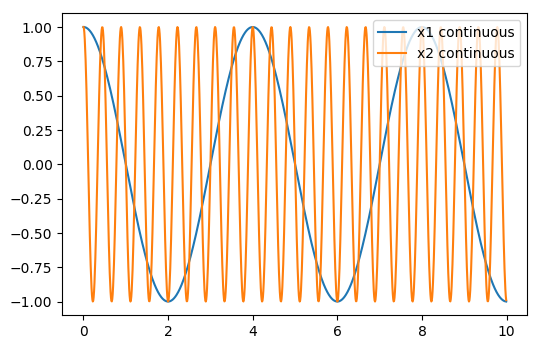

In [10]:
plt.plot(t_continuous, sample(x1, t_continuous), label='x1 continuous')
plt.plot(t_continuous, sample(x2, t_continuous), label='x2 continuous')
plt.legend(loc='upper right')

And now the discrete versions:

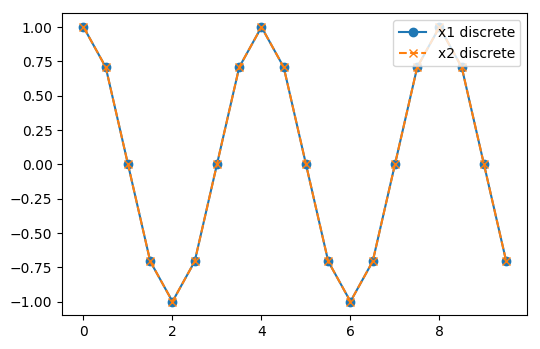

In [15]:
plt.plot(t_discrete, sample(x1, t_discrete), '-o', label='x1 discrete')
plt.plot(t_discrete, sample(x2, t_discrete), '--x', label='x2 discrete')
plt.legend(loc='upper right')

We can overlay the continuous versions for a better view of why this is so:

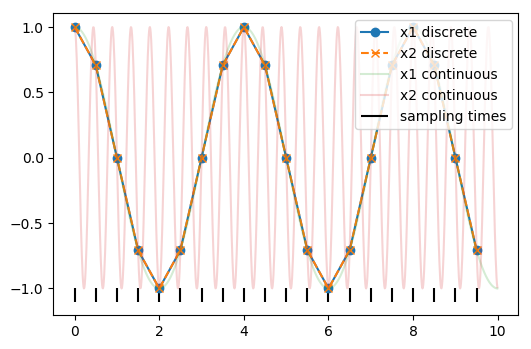

In [27]:
plt.plot(t_discrete, sample(x1, t_discrete), '-o', label='x1 discrete')
plt.plot(t_discrete, sample(x2, t_discrete), '--x', label='x2 discrete')
plt.plot(t_continuous, sample(x1, t_continuous), label='x1 continuous', alpha=0.2)
plt.plot(t_continuous, sample(x2, t_continuous), label='x2 continuous', alpha=0.2)
plt.vlines(t_discrete, -1.1, -1, label='sampling times')
plt.legend(loc='upper right')

The sampled signals are the same! One can say, they are "aliases" of each other (see here for more explanations <https://www.quora.com/What-is-the-intuitive-meaning-of-the-Nyquist%E2%80%93Shannon-sampling-theorem>).

Where did that come from? Well, doing the math for the second discrete signal yields:

$$
x_2 [n] = \cos(\frac{9\pi}{4} n ) = \cos((\frac{8\pi}{4} + \frac{\pi}{4}) n ) = \cos((2\pi + \frac{\pi}{4}) n ) = \cos(\frac{\pi}{4} n) = x_1[n]
$$

How do we solve this? One way of doing this is to only keep sinusoids that have a unique representation after the sampling operation. 

If we have a continuous time pulsation $\omega_c$, it will get mapped, through sampling, to $\omega_d = \omega_c T_s$. But the discrete pulsation has to be below $2 \pi$, unless you want to have aliases possible. Therefore:

$$
-\pi \leq \omega_c T_s <  \pi
$$

$$
-\frac{\pi}{T_s} \leq \omega_c < \frac{\pi}{T_s }
$$

This is strongly related to the Shannon-Nyquist sampling theorem.

In our example, that means that we cannot use pulsations greater than $4 \pi$. That's why $x_2$ is not "allowed" with our sampling frequency. 

If we increase the sampling frequency by a factor of two, the limit goes up and the two sinusoids are not alises of each other anymore.

In [17]:
t_discrete2 = np.arange(0, 10, 0.25)

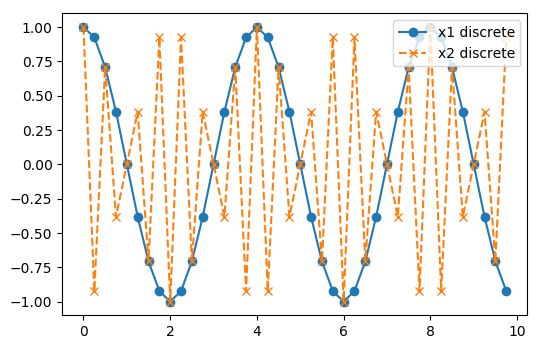

In [19]:
plt.plot(t_discrete2, sample(x1, t_discrete2), '-o', label='x1 discrete')
plt.plot(t_discrete2, sample(x2, t_discrete2), '--x', label='x2 discrete')
plt.legend(loc='upper right')

Now the highest allowable pulsation is $8 \pi$, so even if the sampled waveforms are not nice looking, at least they are not confusable anymore.